<a href="https://colab.research.google.com/github/siliconemonster/IA-2020.1/blob/main/Algoritmo_Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1> ALGORITMO GENÉTICO**


Aline Freire de Rezende - 116110571<br>
Larissa Monteiro da Fonseca Galeno - 116083017

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt 

<h2>1 - Modelagem do Indivíduo

<h3>a) Utilize a mesma representação de tabuleiro usada na tarefa do Hill Climbing.

No caso de um tabuleiro 4x4, como o caso acima, temos um vetor de 1x4, vazio. Só pode haver uma rainha por coluna, então a coluna em que existir uma, será representada pelo número da linha.<br>
**Por exemplo:**<br>
Um tabuleiro do tipo: <br>
[0 &nbsp; 0 &nbsp; 0 &nbsp; 0]<br>
[R &nbsp; 0 &nbsp; 0 &nbsp; R]<br>
[0 &nbsp; R &nbsp; 0 &nbsp; 0]<br>
[0 &nbsp; 0 &nbsp; R &nbsp; 0]<br>
onde 0 representa onde está vazio, e R representa onde há uma rainha; na modelagem em questão, é representado por: <br>
[2 &nbsp; 3 &nbsp; 4 &nbsp; 2]

<h3>b) Proponha uma representação binária para o tabuleiro.

<h2>2 - Geração População Inicial

<h3>a) Defina uma função que dado o tamanho n de uma população, gera aleatoriamente um conjunto de n indivíduos. A função deve funcionar para os dois tipos de indivíduos definidos no item anterior.

In [2]:
def geraTabuleiro(n):
  tabuleiro = []

  for x in range(n):
    posicaoRainha = random.randint(1, n)
    tabuleiro.append(posicaoRainha)

  return tabuleiro

geraTabuleiro(4)

[1, 2, 4, 1]

In [3]:
def geraPopulacao(numIndividuos, n):
  populacao = []

  for i in range(numIndividuos):
    populacao.append(geraTabuleiro(n)) ##### FALTA LIDAR COM ELEMENTOS REPETIDOS

  return populacao

geraPopulacao(10, 4)

[[1, 2, 3, 1],
 [2, 2, 2, 1],
 [3, 3, 4, 2],
 [2, 1, 2, 4],
 [3, 4, 4, 2],
 [3, 3, 4, 3],
 [1, 3, 4, 3],
 [2, 2, 3, 4],
 [4, 2, 4, 4],
 [4, 1, 1, 2]]

<h2>3 - Operadores: Para os dois tipos de indivíduos definidos acima:

<h3>a) Defina a função de adaptação usada para avaliar um tabuleiro T.

In [4]:
def avaliaAtaques(tabuleiro):
  n = len(tabuleiro)
  ataques = 0

  for i in range(n-1): # caso esteja na mesma coluna
    for j in range(i+1, n):
      if (tabuleiro[i] == tabuleiro[j]):
        ataques = ataques + 1

  for i in range(n-1): # caso esteja na mesma diagonal. Para baixo e para cima, respectivamente
    for j in range(i+1, n):
      if ((tabuleiro[i] == tabuleiro[j] + (j - i)) or (tabuleiro[i] == tabuleiro[j] - (j - i))):
        ataques = ataques + 1

  #print("Número de ataques:")
  #print(ataques)
  return ataques

tabuleiro = geraTabuleiro(4)
avaliaAtaques(tabuleiro)

5

In [5]:
def funcaoFitness(tabuleiro):
  qtd_rainhas = len(tabuleiro)
  max_ataques = math.factorial(qtd_rainhas)/(math.factorial(qtd_rainhas - 2) * 2) #combinação para saber o total de ataques
  #print(max_ataques)
  num_ataques = avaliaAtaques(tabuleiro)
  #inverte a quantidade de ataques
  valorFitness = max_ataques - num_ataques

  return valorFitness

  
tabuleiro = geraTabuleiro(4)
funcaoFitness(tabuleiro)

2.0

<h3>b) Defina a função que dada uma população P, constrói a roleta viciada correspondente a P.


In [6]:
def roletaViciada(populacao):
  #print(populacao)
  n = len(populacao)
  roleta = []

  for i in range(n):
    #print(populacao[i])
    valor = funcaoFitness(populacao[i])
    #print(valor)
    roleta.append(valor)
  
  total = sum(roleta)
  
  #print(roleta, total)
  return roleta, total

roletaViciada(geraPopulacao(6, 4))

([0.0, 3.0, 4.0, 5.0, 2.0, 1.0], 15.0)

<h3>c) Defina a função que dada uma população P constrói uma população intermediária correspondente a P. (seleção)


In [7]:
def selecao(populacao):
  #print("Populacao Inicial" + str(populacao))
  n = len(populacao)
  populacao_int = []

  roleta, total = roletaViciada(populacao)

  for i in range(n):
    sorteado = random.randint(0, total)
    #print("Sorteado " + str(sorteado))
    esquerda = 0
    direita = roleta[0]
    j = 0
    while(True):
      if sorteado == 0:
        populacao_int.append(populacao[j])
        break
      elif sorteado > esquerda and sorteado <= direita:
        populacao_int.append(populacao[j])
        break
      esquerda = direita
      direita = direita + roleta[j+1]
      j = j + 1
  
  return populacao_int

selecao(geraPopulacao(6, 4))

[[3, 3, 1, 2],
 [2, 2, 1, 1],
 [3, 3, 1, 2],
 [4, 4, 3, 1],
 [3, 3, 1, 2],
 [4, 4, 3, 1]]

<h3>d) Defina a função que faz o crossover entre dois indivíduos. (crossover)


In [8]:
def crossover(mae1, mae2):
  n = len(mae1)
  pontoCorte = random.randint(0, n-2) #ponto corte
  #print(pontoCorte)

  inicio1 = mae1[:pontoCorte+1]
  final1 = mae2[pontoCorte+1:]
  filha1 = inicio1 + final1

  inicio2 = mae2[:pontoCorte+1] 
  final2 = mae1[pontoCorte+1:]
  filha2 = inicio2 + final2

  return filha1, filha2

crossover([1, 2, 3, 3], [2, 3, 3, 4])

([1, 2, 3, 4], [2, 3, 3, 3])

<h3>e) Defina a função que faz a mutação em um dado indivíduo. (mutação)

In [10]:
#Troca o aleatorio escolhido por quem tá do lado direito, se o aleatorio for o ultimo troca com o primeiro
def mutacao(individuo):  #### EXISTEM OUTROS TIPOS DE MUTAÇÃO
  n = len(individuo)
  aleatorio = random.randint(0, n-1)
  #print(aleatorio)

  if (aleatorio == n-1):
    aux = individuo[aleatorio]
    individuo[aleatorio] = individuo[0]
    individuo[0] = aux

  else:
    aux = individuo[aleatorio]
    individuo[aleatorio] = individuo[aleatorio + 1]
    individuo[aleatorio + 1] = aux

  return individuo

mutacao([1,2,3,4,5,6,7,8])

[8, 2, 3, 4, 5, 6, 7, 1]

<h2>4 - Algoritmo Genético Básico

<h2>a) Implemente o algoritmo genético básico. Sua implementação deve ter como parâmetros de entrada:

* Tamanho da população
* Número de gerações
* Probabilidade de Crossover
* Probabilidade de Mutação
* Utilização de Elitismo: no elitismo, uma cópia do melhor indivíduo da geração Pi−1 é passada para a geração Pi, sem passar pelos operadores.


<h2>A saída do programa deve ser composta por 2 gráficos:

* geração × função de adaptação do melhor indivíduo da geração
* geração × média da função de adaptação dos indivíduos da geração

<h2>e o melhor indivíduo da última geração e o valor da sua função de adaptação.

In [11]:
def achaMelhorIndividuo(populacao):
  n = len(populacao)
  melhor = populacao[0]
  melhor_atq = avaliaAtaques(melhor)
  
  #achar a quantidade de ataques de um tabuleiro 
  #ver quem tem menos ataques (mais perto da solução)
  #quem tiver menos ataques, calcular a funca de fitness
  for i in range(1, n):
    aux = avaliaAtaques(populacao[i])
    if melhor_atq > aux:
      melhor_atq = aux
      melhor = populacao[i]
  
  melhor_f = funcaoFitness(melhor)

  return melhor, melhor_f

pop = geraPopulacao(6, 4)
achaMelhorIndividuo(pop)

([3, 3, 1, 4], 4.0)

[[2, 8, 3, 6, 5, 6, 6, 7], [5, 1, 2, 8, 6, 7, 1, 7], [4, 5, 5, 2, 2, 7, 2, 8], [4, 2, 3, 6, 1, 6, 3, 1], [1, 5, 7, 3, 1, 2, 1, 1], [1, 4, 7, 7, 7, 4, 4, 4]]
Proxima geracao
delta <= 0.01


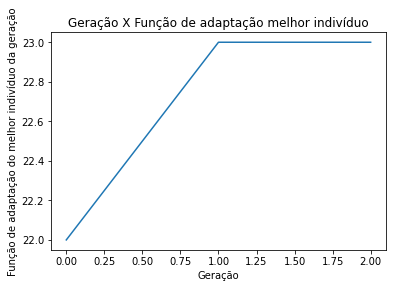

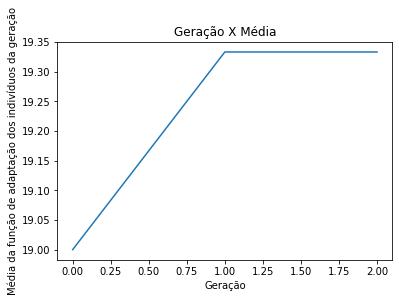

([[1, 4, 7, 3, 1, 2, 1, 1],
  [1, 5, 7, 7, 5, 6, 6, 7],
  [1, 5, 7, 3, 1, 2, 1, 1],
  [1, 5, 7, 3, 1, 2, 1, 1],
  [1, 5, 7, 3, 1, 2, 4, 7],
  [1, 4, 7, 7, 7, 4, 1, 1]],
 [1, 5, 7, 3, 1, 2, 4, 7],
 23.0)

In [12]:
def genetico(tam_populacao, num_geracoes, probCrossover, probMutacao, elitismo):
  n = 8
  populacao = geraPopulacao(tam_populacao, n)
  geracao = 0
  nova_geracao = []
  print(populacao)

  melhor, melhor_f = achaMelhorIndividuo(populacao)
  x_geracao = [geracao]
  y_melhorF = [melhor_f]
  y_media = []
  
  if elitismo == False:

    while geracao <= num_geracoes:
      #print("POPULACAO" + str(populacao))
      # FAZ A SELEÇÃO
      pop_inter1 = selecao(populacao)
      #print("Pop inter1" + str(pop_inter1))

      #FAZ O CROSSOVER na populacao intermedária e retorna uma nova pop intermediária
      pop_inter2 = [] #vai armazenar o que veio do crossover
      while len(pop_inter1) > 0:
        aux1 = random.randint(0, len(pop_inter1)-1) #sorteio as mães
        mae1 = pop_inter1[aux1] 
        pop_inter1.pop(aux1) #já retiro para não ter chance de sortear o mesmo duas vezes

        aux2 = random.randint(0, len(pop_inter1)-1)
        mae2 = pop_inter1[aux2] 
        pop_inter1.pop(aux2)
        
        probCalculada = random.uniform(0, 1)
        if probCalculada <= probCrossover: #se for menor ou igual sofre o crossover
          filha1, filha2 = crossover(mae1, mae2)
          pop_inter2.append(filha1)
          pop_inter2.append(filha2)
        else:
          pop_inter2.append(mae1) #se não sofreu corssover copia
          pop_inter2.append(mae2)
      
      #print("Pop inter2" + str(pop_inter2))
      #FAZ MUTAÇÃO NA pop intermediária e retorna a nova geração
      nova_geracao = []
      for i in range(len(pop_inter2)): #ver quem vai sofrer mutacao
        probCalculada = random.uniform(0, 1)
        if probCalculada <= probMutacao:
          novo_individuo = mutacao(pop_inter2[i])
          nova_geracao.append(novo_individuo)
        else:
          nova_geracao.append(pop_inter2[i])
      
      #Checar se minha populacao chegou a uma estabilidade
      t, soma_total = roletaViciada(populacao)
      media_pop = soma_total/tam_populacao
      y_media.append(media_pop)
      t, soma_total_nova = roletaViciada(nova_geracao)
      media_nova = soma_total_nova/tam_populacao

      delta = media_nova - media_pop
      #print(delta)
      if delta < 0: #se delta for negativo, significa que a média da pop atual é melhor
        print("delta < 0")
        break
      elif delta <= 0.11: #se a diferença entre as médias for menor que ou igual a 5
        print("delta <= 0.01")
        #print("NOVA GERACAO" + str(nova_geracao))
        populacao = nova_geracao #chegamos a uma geracao interessante
        geracao = geracao + 1
        x_geracao.append(geracao)
        melhor, melhor_f = achaMelhorIndividuo(populacao)
        y_melhorF.append(melhor_f)
        y_media.append(media_nova)
        break
      else:
        print("Proxima geracao")
        #print("NOVA GERACAO" + str(nova_geracao))
        populacao = nova_geracao
        geracao = geracao + 1
        x_geracao.append(geracao)
        melhor, melhor_f = achaMelhorIndividuo(populacao)
        y_melhorF.append(melhor_f)


  else:
    print("Elitismo é true, falta fazer")
    return 

  ## PLOTANDO O GRÁFICO 1
  plt.plot(x_geracao, y_melhorF) 
  plt.xlabel('Geração')  
  plt.ylabel('Função de adaptação do melhor indivíduo da geração') 
  plt.title('Geração X Função de adaptação melhor indivíduo') 
  plt.show()

  ## PLOTANDO O GRÁFICO 2
  plt.plot(x_geracao, y_media) 
  plt.xlabel('Geração')  
  plt.ylabel('Média da função de adaptação dos indivíduos da geração') 
  plt.title('Geração X Média') 
  plt.show()

  #print(x_geracao)
  #print(y_melhorF)
  #print("GERACAO " + str(geracao))
  return populacao, melhor, melhor_f
genetico(6, 7, 0.8, 0.01, False)


Entrada sorteada: [[2, 3, 2, 3], [3, 1, 3, 2], [1, 3, 2, 1], [4, 1, 3, 4], [4, 4, 3, 2], [2, 1, 3, 2]]

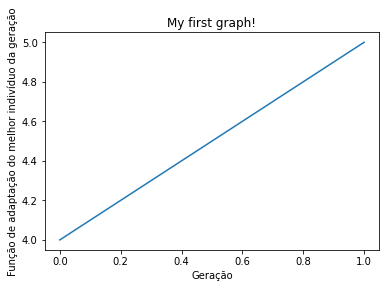

Exemplo de um caso que começou dando certo: [[2, 4, 1, 3], [1, 2, 1, 4], [4, 3, 3, 2], [2, 1, 1, 3], [1, 3, 3, 2], [1, 1, 3, 3]]

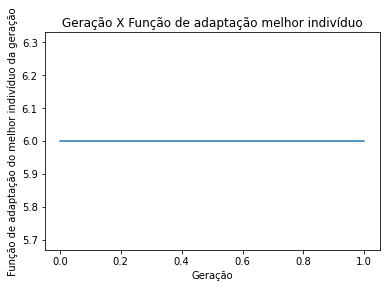



Exemplo de um caso estranho (função de adaptação teve o comportamento contrário do esperado): [[5, 8, 1, 3, 7, 1, 8, 6], [6, 7, 5, 3, 3, 8, 1, 6], [8, 1, 1, 4, 2, 7, 5, 3], [1, 4, 4, 3, 3, 7, 3, 3], [3, 8, 7, 7, 2, 2, 7, 4], [5, 5, 4, 6, 6, 2, 4, 5]]

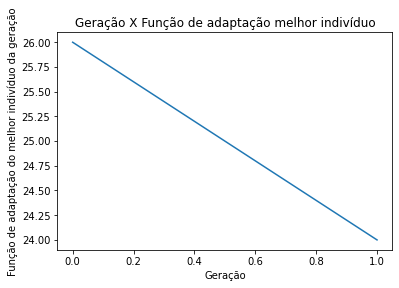

<h2>5 - Utilizando diferentes valores para os parâmetros de entrada, diferentes representações de indivíduos e diferentes tamanhos de tabuleiro (4,8,16,32), compare e discuta os resultados obtidos.